
Датасет: https://www.kaggle.com/c/stumbleupon
NLP задача с использованием стандартных представлений документов (BOW, Tf-Idf).




## Импорт библиотек

In [0]:
#Базовы библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
#Импорт библиотек, для теста нормального распределения
from scipy.stats import kurtosis # экцесс
from scipy.stats import skew
from scipy.stats import shapiro
from scipy.stats import normaltest

In [0]:
import re
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,  GaussianNB, BernoulliNB, GaussianNB, ComplementNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_curve, precision_score, auc, roc_auc_score
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [0]:
#connect Gdrive

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Загрузка 

In [0]:
# Выводим список файлов в папке
file_list = drive.ListFile({'q': "'11vzgL19xcQB9iSrHSRWd2zcU-TJEGdy2' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: 08_hw Sokolov Copy of Homework 8.ipynb, id: 13UPWn13d1epz0Xmk6-O8_bggmaFXyEQJ
title: train.tsv, id: 1K8ZZFZvvLLIn1hvDdgcHsJJlhelCnCM3
title: Copy of Homework 8.ipynb, id: 1q44BLiHRmO3Id3zArY56u56DsLY68d3h
title: Copy of sms_spam.ipynb, id: 1uzHvHZS36I-OpxtIqkwS_708U1aQUc0s
title: Copy of NLP.ipynb, id: 1C0PMWPnJ4nun7IO6A0rRNqpLM-AZ5dVQ
title: 8_NLP.pptx, id: 18mVGtH3IYTRfh2_Ut8wo604MNW07cSQt


In [0]:
#Подгружаем данные
#1
train_downloaded = drive.CreateFile({'id': '1K8ZZFZvvLLIn1hvDdgcHsJJlhelCnCM3'})
train_downloaded.GetContentFile('train.tsv')

In [0]:
data = pd.read_csv("train.tsv", sep ='\t')

In [0]:
data.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0,0.090774,0,0.245831,0.003883,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0,0.098707,0,0.203490,0.088652,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0,0.072448,0,0.226402,0.120536,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0,0.095861,0,0.265656,0.035343,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,0,0.024908,0,0.228887,0.050473,1,1,14,0,12032,162,10,0.098765,0.082569,0


## Описание

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 27 columns):
url                               7395 non-null object
urlid                             7395 non-null int64
boilerplate                       7395 non-null object
alchemy_category                  7395 non-null object
alchemy_category_score            7395 non-null object
avglinksize                       7395 non-null float64
commonlinkratio_1                 7395 non-null float64
commonlinkratio_2                 7395 non-null float64
commonlinkratio_3                 7395 non-null float64
commonlinkratio_4                 7395 non-null float64
compression_ratio                 7395 non-null float64
embed_ratio                       7395 non-null float64
framebased                        7395 non-null int64
frameTagRatio                     7395 non-null float64
hasDomainLink                     7395 non-null int64
html_ratio                        7395 non-null float64
image_r

In [0]:
data.columns.tolist()

['url',
 'urlid',
 'boilerplate',
 'alchemy_category',
 'alchemy_category_score',
 'avglinksize',
 'commonlinkratio_1',
 'commonlinkratio_2',
 'commonlinkratio_3',
 'commonlinkratio_4',
 'compression_ratio',
 'embed_ratio',
 'framebased',
 'frameTagRatio',
 'hasDomainLink',
 'html_ratio',
 'image_ratio',
 'is_news',
 'lengthyLinkDomain',
 'linkwordscore',
 'news_front_page',
 'non_markup_alphanum_characters',
 'numberOfLinks',
 'numwords_in_url',
 'parametrizedLinkRatio',
 'spelling_errors_ratio',
 'label']

In [0]:
data.shape

(7395, 27)

In [0]:
data.isna().sum()

url                               0
urlid                             0
boilerplate                       0
alchemy_category                  0
alchemy_category_score            0
avglinksize                       0
commonlinkratio_1                 0
commonlinkratio_2                 0
commonlinkratio_3                 0
commonlinkratio_4                 0
compression_ratio                 0
embed_ratio                       0
framebased                        0
frameTagRatio                     0
hasDomainLink                     0
html_ratio                        0
image_ratio                       0
is_news                           0
lengthyLinkDomain                 0
linkwordscore                     0
news_front_page                   0
non_markup_alphanum_characters    0
numberOfLinks                     0
numwords_in_url                   0
parametrizedLinkRatio             0
spelling_errors_ratio             0
label                             0
dtype: int64

In [0]:
# препроцессинг текста
def text_preprocess(text):    
    reg = re.compile('[^а-яА-Яa-zA-Z0-9]') #
    text = text.lower()
    text = reg.sub(' ', text)
    lemmatizer = WordNetLemmatizer()
    text_ =''
    for word in text.split():
        #text_.append(lemmatizer.lemmatize(word))
        text_ = text_+ ' ' + lemmatizer.lemmatize(word)
    return text_

In [0]:
data=data[['boilerplate','label']]
data.head()

,boilerplate,label
0,"{""title"":""IBM Sees Holographic Calls Air Breat...",0
1,"{""title"":""The Fully Electronic Futuristic Star...",1
2,"{""title"":""Fruits that Fight the Flu fruits tha...",1
3,"{""title"":""10 Foolproof Tips for Better Sleep ""...",1
4,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",0


In [0]:
data.shape

(7395, 2)

In [0]:
data['boilerplate'] = data['boilerplate'].apply(text_preprocess)

In [0]:
data.head()

,boilerplate,label
0,title ibm see holographic call air breathing ...,0
1,title the fully electronic futuristic startin...,1
2,title fruit that fight the flu fruit that fig...,1
3,title 10 foolproof tip for better sleep body ...,1
4,title the 50 coolest jersey you didn t know e...,0


X y. Bag of words

In [0]:
X = data['boilerplate']
y = data['label']
cv = CountVectorizer() # Bag of WORDS (BOW)
X = cv.fit_transform(X)

train test split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Fit_model

In [0]:
def fit_model(model, X, y, parameters):  
  cross_validation = StratifiedKFold(n_splits=5)

  grid_search = GridSearchCV(model,
                              scoring='accuracy',
                              param_grid=parameters,
                              cv=cross_validation,
                              verbose=1
                            )

  grid_search.fit(X, y)
  parameters=grid_search.best_params_
  print('Best score: {}'.format(grid_search.best_score_))
  print('Best parameters: {}'.format(parameters))

  return grid_search

Метркиа

In [0]:
# метрика
def value_of_metrics(y_true, y_pred):
    print('Accuracy: ', accuracy_score(y_true, y_pred))
    print('Recall: ', recall_score(y_true, y_pred))
    print('Precision: ', precision_score(y_true, y_pred))  
    print('F1: ', f1_score(y_true, y_pred))
    print('Roc_AUC: ', roc_auc_score(y_true, y_pred))
    
    fpr, tpr, threshold = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.title('My DataSet')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Функция Bayes

In [0]:


def Bern(train, targets):
  parameter_grid = {
                 'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0],
                 'binarize': [0.0, 0.2, 0.5],
                 'fit_prior': ['True', 'False']
                 }
  bernoulli = BernoulliNB()
  trained_bernoulli = fit_model(bernoulli, train, targets, parameter_grid)
  return trained_bernoulli

def Gaus(train, targets):
  gaussian_nb = GaussianNB()
  parameter_grid = {
                 'var_smoothing': [1e-09, 1e-10, 1e-11, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
                 }
  trained_gaussian_nb = fit_model(gaussian_nb, train, targets, parameter_grid)
  return trained_gaussian_nb

def Multi_nb(train, targets):
  multi_nb = MultinomialNB()
  parameter_grid = {
                 'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0],
                 'fit_prior': ['True', 'False']
                 }
  trained_multi_nb = fit_model(multi_nb, train, targets, parameter_grid)
  return trained_multi_nb

def Complement_nb(train, targets):
  complement_nb = ComplementNB()
  parameter_grid = {
                 'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0],
                 'fit_prior': ['True', 'False'],
                 'norm': ['True', 'False']
                 }
  trained_complement_nb = fit_model(complement_nb, train, targets, parameter_grid)
  return trained_complement_nb


In [0]:
# BAYES bern
bern = Bern(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score: 0.7616300036062027
Best parameters: {'alpha': 0.001, 'binarize': 0.0, 'fit_prior': 'True'}


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    6.4s finished


Accuracy:  0.7712276906435911
Recall:  0.6268817204301075
Precision:  0.8846737481031867
F1:  0.7337948395217118
Roc_AUC:  0.7720915675055869


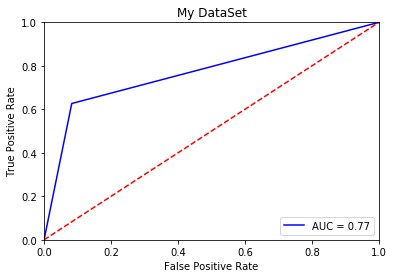

In [0]:
#метрика
value_of_metrics(y_test,bern.predict(X_test))

MultinomialNB

In [0]:
#MultinomialNB
Multi_nb = Multi_nb(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score: 0.8115759105661738
Best parameters: {'alpha': 1.0, 'fit_prior': 'True'}


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.3s finished


Accuracy:  0.8053001622498648
Recall:  0.7279569892473118
Precision:  0.8635204081632653
F1:  0.7899649941656942
Roc_AUC:  0.805763043045854


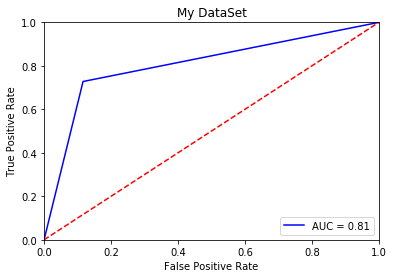

In [0]:
#метрика
value_of_metrics(y_test,Multi_nb.predict(X_test))

SVM

In [0]:
svm = LinearSVC()
svm.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Accuracy:  0.7203893996755003
Recall:  0.7161290322580646
Precision:  0.7247007616974973
F1:  0.7203893996755003
Roc_AUC:  0.7204148969777808


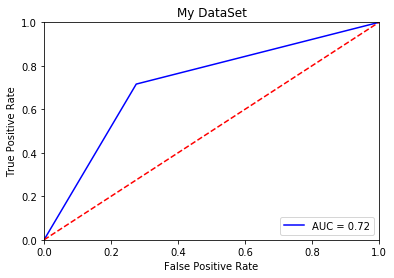

In [0]:
value_of_metrics(y_test,svm.predict(X_test))

LogisticRegression

In [0]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy:  0.76473769605192
Recall:  0.7344086021505376
Precision:  0.7841561423650976
F1:  0.7584675180455303
Roc_AUC:  0.7649192085834299


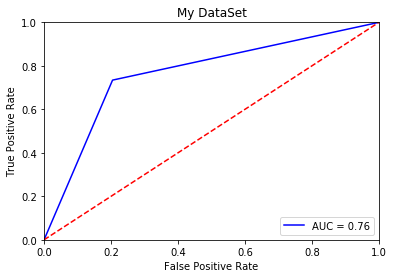

In [0]:
value_of_metrics(y_test,lr.predict(X_test))

**Tfid**



In [0]:
X = dt['boilerplate']
y = dt['label']
cv = TfidfVectorizer() #Tfid
X = cv.fit_transform(X)

In [0]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, random_state=42)

Bayes_2

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    5.2s finished


Best score: 0.7646952758745041
Best parameters: {'alpha': 0.001, 'binarize': 0.0, 'fit_prior': 'True'}
Accuracy:  0.772850189291509
Recall:  0.6258064516129033
Precision:  0.8899082568807339
F1:  0.734848484848485
Roc_AUC:  0.773730211660641


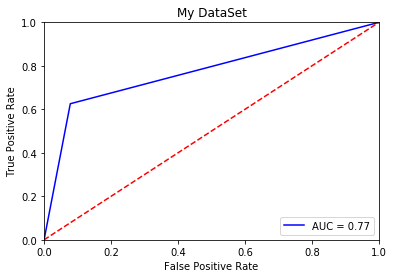

In [0]:
#bayes_2
bern_2 = Bern(X_train2, y_train2)
value_of_metrics(y_test2,bern_2.predict(X_test2))

LogisticRegression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy:  0.8069226608977826
Recall:  0.7376344086021506
Precision:  0.8585732165206508
F1:  0.7935222672064778
Roc_AUC:  0.8073373348777891


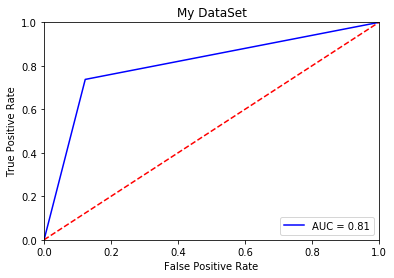

In [0]:
lr2 = LogisticRegression()
lr2.fit(X_train2, y_train2)
value_of_metrics(y_test2,lr2.predict(X_test2))

SVM_2

Accuracy:  0.7977285018929151
Recall:  0.7559139784946236
Precision:  0.8270588235294117
F1:  0.789887640449438
Roc_AUC:  0.7979787520329484


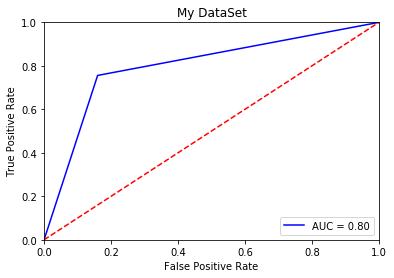

In [0]:
svm_2 = LinearSVC()
svm_2.fit(X_train2, y_train2)
value_of_metrics(y_test2,svm_2.predict(X_test2))

**Вывод**

Лучшие результаты 

MultinomialNB: AUC = 0,81 (bag of words)

SVM_2: AUC = 0,7979 (Tfid)

LogisticRegression: AUC = 0,81 (bag of words)